## Google Search Analysis

In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Getting the other necessary libraries

* Connect to Google

In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
Trending_topics = TrendReq(hl='en-US', tz=360)

* Building Payload

In [3]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe="today 12-m")

* Interest over time

In [4]:
Trending_topics.build_payload(kw_list=["Cloud Computing"],
                              cat=0, timeframe='today 12-m')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2023-12-03              100      False
2023-12-10               93      False
2024-01-28               87      False
2023-11-26               85      False
2023-10-08               83      False
2024-04-21               81      False
2024-02-18               81      False
2023-11-19               81      False
2024-01-21               80      False
2023-09-24               80      False


* Visualize by Dates

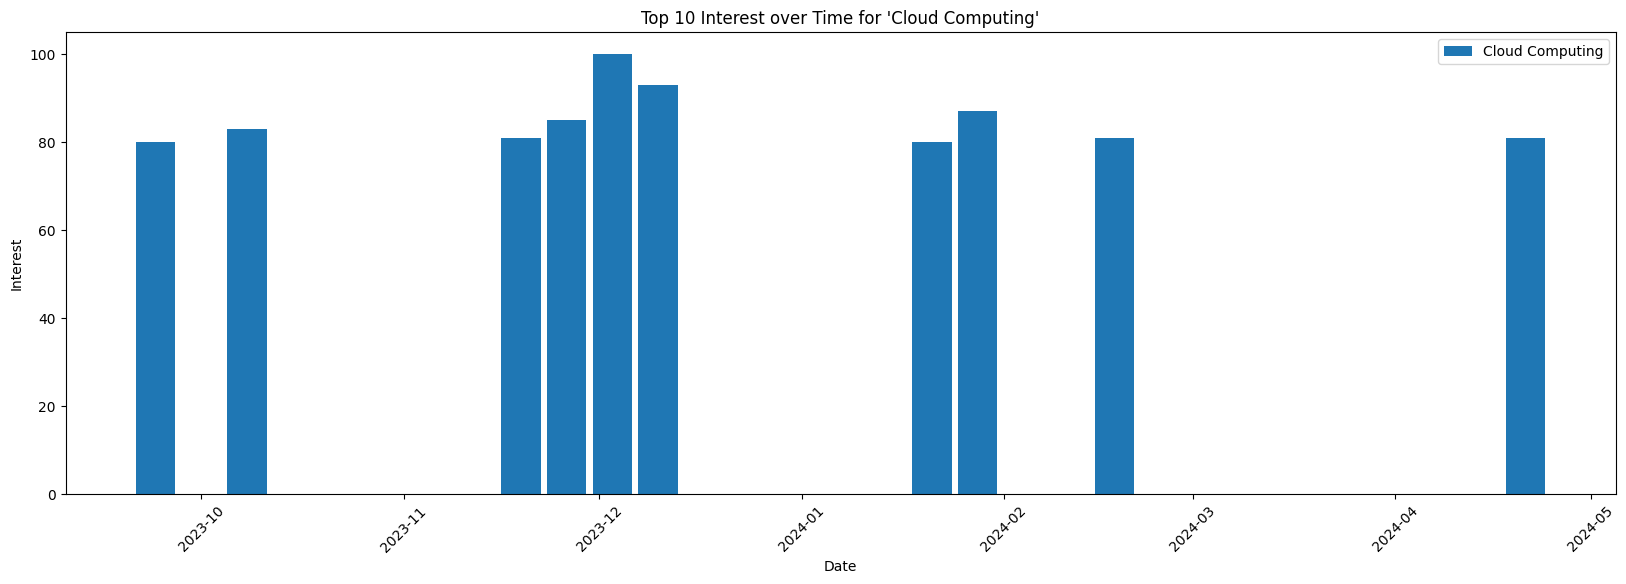

In [5]:
plt.figure(figsize=(20, 6))
plt.bar(data.index, data["Cloud Computing"], width=6, label="Cloud Computing")
plt.title("Top 10 Interest over Time for 'Cloud Computing'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.xticks(rotation=45)
plt.legend()
plt.show()

* Interest by Region

In [6]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print(data)

            Cloud Computing
geoName                    
Ethiopia                100
Zimbabwe                 80
Nepal                    78
India                    71
Cameroon                 58
St. Helena               58
Sri Lanka                50
Ghana                    47
Kenya                    45
Nigeria                  41


* Visualize By countries

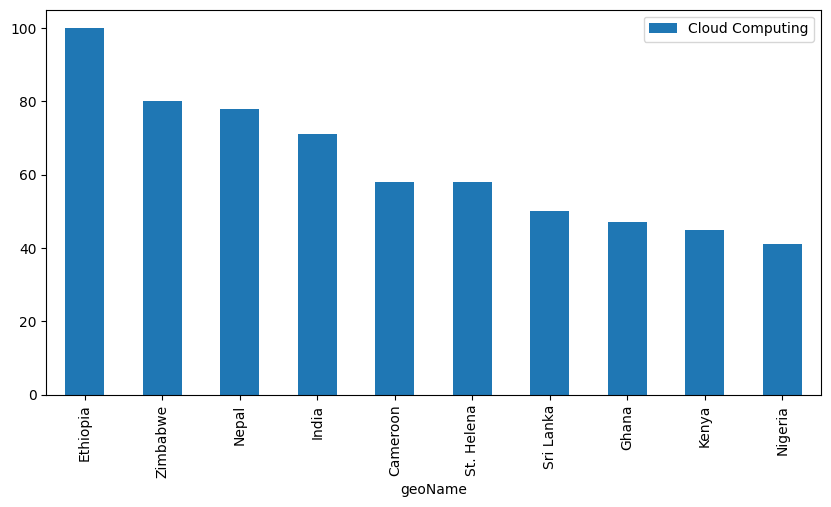

In [7]:
data.reset_index().plot(x='geoName', y='Cloud Computing', figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

* Finding top trending topics

In [8]:
df = Trending_topics.top_charts(2023, hl='en-US', tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,War in Israel and Gaza,Israel Gaza
1,Titanic submarine,
2,Turkey earthquake,
3,Hurricane Hilary,
4,Hurricane Idalia,
5,Hurricane Lee,
6,Maine shooting,
7,Nashville shooting,
8,Chandrayaan-3,Chandrayaan 3
9,War in Sudan,Sudan


* Search For Related Queries

In [13]:
import time
from pytrends.request import TrendReq

# Initialize pytrends
pytrends = TrendReq()

# Build the payload
kw_list = ['Cloud Computing']
pytrends.build_payload(kw_list)

# Introduce a delay before making the request
time.sleep(60)  # Sleep for 60 seconds

# Fetch related queries
try:
    related_queries = pytrends.related_queries()
    print(related_queries.values())
except TooManyRequestsError as e:
    print("Too many requests. Please try again later.")

dict_values([{'top':                                                 query  value
0                             cloud computing service    100
1                                                 aws     70
2                              google cloud computing     65
3                            cloud computing software     64
4                                        google cloud     63
5                             cloud computing meaning     59
6                         security in cloud computing     53
7                            types of cloud computing     44
8                                                saas     38
9                               azure cloud computing     37
10                           cloud computing benefits     34
11                                               iaas     30
12                                  quantum computing     13
13                                cloud computing etf      8
14                  iaas paas saas in cloud computing      8
15 

* Keyword suggestions

In [14]:
keywords = Trending_topics.suggestions( 
  keyword='Cloud Computing') 
df = pd.DataFrame(keywords) 
df.drop(columns= 'mid')  

,title,type
0,Cloud computing,Topic
1,Cloud computing security,Topic
2,Alibaba Cloud,Computer application company
